In [12]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [13]:
# Load a model
model = YOLO("d:/Coding/Projects/number-plate-recognition/runs/detect/train21/weights/best.onnx")

In [15]:
# Load image
path_image = "D:/Coding/Projects/number-plate-recognition/data/K1_G6853EQ.jpg"
img = cv2.imread(path_image)
img_size = img.shape[0:2]

# Predict plat
results = model(path_image, save=True, conf=0.1)
results


image 1/1 D:\Coding\Projects\number-plate-recognition\data\K1_G6853EQ.jpg: 640x640 2 plat-nomors, 233.0ms
Speed: 8.3ms preprocess, 233.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to d:\Coding\Projects\number-plate-recognition\runs\detect\predict3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'plat-nomor'}
 orig_img: array([[[244, 245, 241],
         [244, 245, 241],
         [244, 245, 241],
         ...,
         [ 35,  33,  32],
         [ 37,  35,  34],
         [ 36,  34,  33]],
 
        [[243, 244, 240],
         [243, 244, 240],
         [243, 244, 240],
         ...,
         [ 34,  32,  31],
         [ 37,  35,  34],
         [ 37,  35,  34]],
 
        [[244, 245, 241],
         [243, 244, 240],
         [243, 244, 240],
         ...,
         [ 32,  33,  31],
         [ 34,  35,  33],
         [ 34,  35,  33]],
 
        ...,
 
        [[ 67,  73,  80],
         [ 67,  73,  80],
         [ 70,  76,  83],
         ...,
         [121, 124, 128],
         [116, 119, 123],
         [105, 108, 112]],
 
        [[ 60,  66,  73],
         [ 59,  65,  72],
         [ 63,  69,  76],
         ...,
         [118, 121, 125],


image 1/1 D:\Coding\Projects\number-plate-recognition\data\K1_G6853EQ.jpg: 640x640 1 plat-nomor, 219.9ms
Speed: 12.2ms preprocess, 219.9ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 640)


PLAT-NOMOR


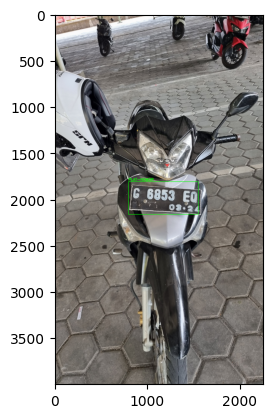

In [16]:
# Load image
path_image = "D:/Coding/Projects/number-plate-recognition/data/K1_G6853EQ.jpg"
img = cv2.imread(path_image)
img_size = img.shape[0:2]

# Predict plat
results = model(path_image)[0]

# Draw rectangle
for result in results.boxes.data.tolist():
    x1, y1, x2, y2, score, class_id = result
    cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 4)
    cv2.putText(img, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
            cv2.FONT_HERSHEY_SIMPLEX, 1.3, (0, 255, 0), 3, cv2.LINE_AA)
    print(results.names[int(class_id)].upper())

# Show image
# cv2.namedWindow('image', cv2.WINDOW_NORMAL)  # WINDOW_NORMAL memungkinkan pengubahan ukuran jendela
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# cv2.imshow('image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([])
conf: tensor([])
data: tensor([], size=(0, 6))
id: None
is_track: False
orig_shape: (4000, 2252)
shape: torch.Size([0, 6])
xywh: tensor([], size=(0, 4))
xywhn: tensor([], size=(0, 4))
xyxy: tensor([], size=(0, 4))
xyxyn: tensor([], size=(0, 4))
